# `AA Workshop 10` — Coding Challenge

Complete the tasks below to practice implementing classification modeling from `W10_Neural_Networks.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- defining an architecture of a NN
- implementing a NN for a multi-class classification problem
- evaluating performance throughout the fitting process

## Task 1 - Employing a Neural Network to Classify Breast Cancer Cells

In the workshop notebook, you learned how to use the keras framework for both classifcation and regression prediction. The classification example we used was for a binary output (cancer cells being benign or malignant). Let's see how we can employ neural networks for multi-class classification. Do the following:

1. Use the `../data/iris.csv` dataset and preproccess it as usual.
2. Think of an architecture you would employ to enable multi-class classification. You can get some inspiration [here](https://keras.io/guides/sequential_model/).
3. Implement a pipeline that consists of the following:
    1. train the model on training data
    2. evaluate and visualize loss on a training and validation set throughout the fitting of the network
4. Use that pipeline to test different architectures / hyperparameters
5. Report final performance on the test set
6. Think about the model complexity vs. performance tradeoff - is the NN the best overall model?

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import os
os.environ["KERAS_BACKEND"] = "torch"
from keras.utils import to_categorical
from keras import Sequential, Input
from keras.layers import Dense, Dropout

In [2]:
# load and preprocess data
iris = pd.read_csv('../data/iris.csv')
iris.dropna(inplace=True)

X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

iris.head()

,number,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
# encode categorical target vector
y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

In [4]:
# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# create NN model using Keras Sequential API
## initialize
model = Sequential()

## add input layer
model.add(Input((4,)))

## add first hidden layer
model.add(Dense(64, activation=None)) # linear combination
# model.add(Dropout(rate = 0.1)) # optional: dropout

## add second hidden layer
model.add(Dense(32, activation='relu')) # Rectified Linear Unit activation function
# model.add(Dropout(rate = 0.1)) # optional: dropout

## add output layer with one node per output class (i.e. for each iris species)
model.add(Dense(3, activation='softmax'))

## compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
# train and evaluate
def train_and_evaluate(model, visualize=False):
    history = model.fit(X_train, y_train, batch_size = 20, epochs = 20, validation_split=0.3)
    if visualize:
        pd.DataFrame(history.history).plot()

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2179 - loss: 1.2331 - val_accuracy: 0.2941 - val_loss: 1.2129
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4231 - loss: 1.0075 - val_accuracy: 0.4118 - val_loss: 1.0490
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6667 - loss: 0.8302 - val_accuracy: 0.4706 - val_loss: 0.9179
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7436 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 0.8134
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7692 - loss: 0.6102 - val_accuracy: 0.5000 - val_loss: 0.7288
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7949 - loss: 0.5382 - val_accuracy: 0.6471 - val_loss: 0.6642
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077 - loss: 0.4856 - val_accuracy: 0.6765 - val_loss: 0.6115
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8333 - loss: 0.4438 - val_accuracy: 0.7353 - val_loss: 0.5740
Epoch 9/

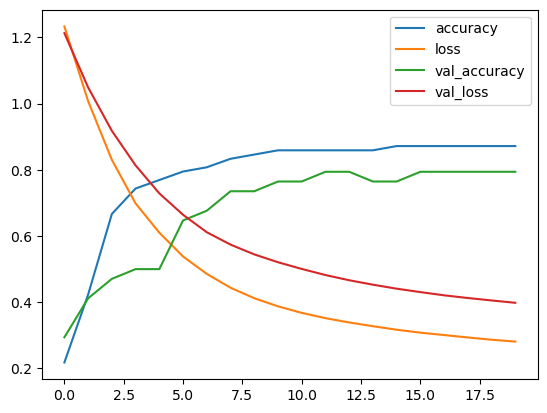

In [8]:
# execute
train_and_evaluate(model, True)

In [9]:
# evaluate performance on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Set Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.3966
Test Set Accuracy: 0.7857


**IMPORTANT**: Remember that the dataset is (before filtering out NaN) just 50 records of every class (species), so it is a really small dataset and there is really no reason to opt for a neural network here! Indeed, these results can be easily achieved with a SVM or Logistic Regression.

This is an important lesson: even though this small NN is fast to build and fit, it is
1. inefficient to use a large network for the task
1. unnecessary to introduce an opaque method, where we have no idea about things like feature importance